In [43]:
import torch
import torchvision
import torchvision.transforms as transforms

In [44]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


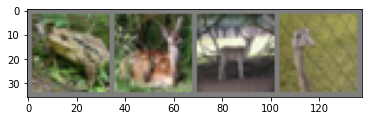

 frog  deer  deer  bird


In [45]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [46]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [47]:
def train(data, trainloader, optimizer):

  for epoch in range(2):  # loop over the dataset multiple times

      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          if i % 5000 == 4999:    # print every 5000 mini-batches
              print('Epoch %d loss: %.3f' %
                    (epoch + 1, running_loss / 5000))
              running_loss = 0.0


In [48]:
def test(testloader):
  correct = 0
  total = 0
  # since we're not training, we don't need to calculate the gradients for our outputs
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          # calculate outputs by running images through the network
          outputs = net(images)
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  print('Accuracy of the network on the 10000 test images: %d %%' % (
      100 * correct / total))

In [49]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
rates = [0.001, 0.0001]
momentums = [0.9, 0.95]
for rate in rates:
  for momentum in momentums:
    print('Learning Rate: %.4f Momentum: %.2f' %(rate, momentum))
    optimizer = optim.SGD(net.parameters(), lr=rate, momentum=momentum)
    train(data, trainloader, optimizer)
    test(testloader)

Learning Rate: 0.0010 Momentum: 0.90
Epoch 1 loss: 1.982
Epoch 1 loss: 1.583
Epoch 2 loss: 1.394
Epoch 2 loss: 1.331
Accuracy of the network on the 10000 test images: 54 %
Learning Rate: 0.0010 Momentum: 0.95
Epoch 1 loss: 1.230
Epoch 1 loss: 1.199
Epoch 2 loss: 1.116
Epoch 2 loss: 1.124
Accuracy of the network on the 10000 test images: 58 %
Learning Rate: 0.0001 Momentum: 0.90
Epoch 1 loss: 1.038
Epoch 1 loss: 1.047
Epoch 2 loss: 0.974
Epoch 2 loss: 1.002
Accuracy of the network on the 10000 test images: 61 %
Learning Rate: 0.0001 Momentum: 0.95
Epoch 1 loss: 0.938
Epoch 1 loss: 0.953
Epoch 2 loss: 0.893
Epoch 2 loss: 0.912
Accuracy of the network on the 10000 test images: 61 %


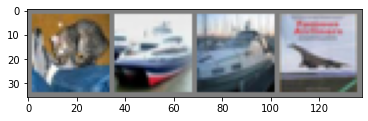

GroundTruth:    cat  ship  ship plane


In [50]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [51]:
outputs = net(images)

In [52]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    dog   car   car  ship


In [53]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class plane is: 61.2 %
Accuracy for class car   is: 84.6 %
Accuracy for class bird  is: 54.1 %
Accuracy for class cat   is: 40.9 %
Accuracy for class deer  is: 51.0 %
Accuracy for class dog   is: 48.6 %
Accuracy for class frog  is: 66.6 %
Accuracy for class horse is: 73.7 %
Accuracy for class ship  is: 75.2 %
Accuracy for class truck is: 63.9 %
